In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import Maze
import analysisTools as tools

In [134]:
N_trials = 400
eps = np.zeros(N_trials)
epsilon = 1
decay_factor = ((0.1)/epsilon) ** (1/int(0.7*N_trials))
for i in range(N_trials): 
    if epsilon>0.1:
        epsilon *= decay_factor
    eps[i] = epsilon

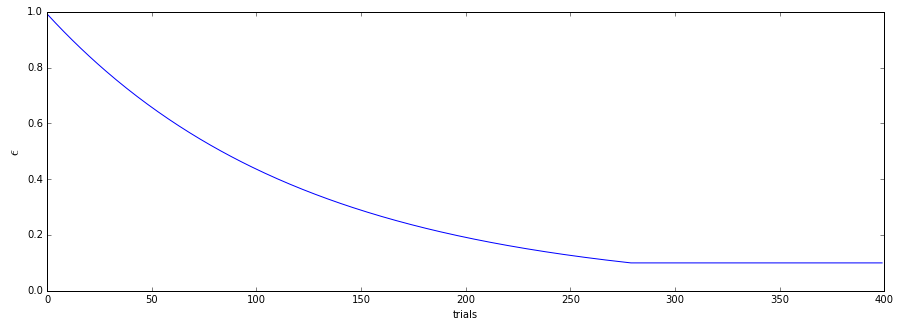

In [143]:
plt.figure(figsize=(15,5))
plt.plot(eps)
#plt.title("Time course of exploration/exploitation parameter $\epsilon$")
plt.xlabel("trials")
plt.ylabel("$\epsilon$", fontsize=15);
plt.savefig("figures/epsilon_timecourse.png")

Learning curve for whole analysis: 400 trials, 10 runs, lambda = 0.4

In [29]:
m = Maze.Maze(lambda_=.4)

In [30]:
m.run(400, 10, False)
lat = m.get_learning_curve()

RUN 0
RUN 1
RUN 2
RUN 3
RUN 4
RUN 5
RUN 6
RUN 7
RUN 8
RUN 9


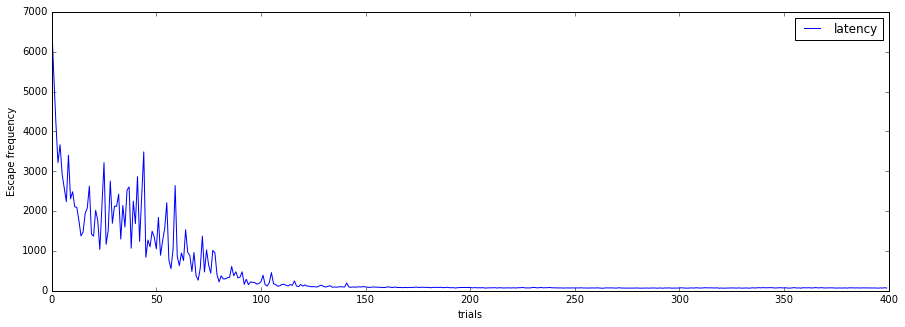

In [31]:
plt.figure(figsize=(15,5))
plt.plot(lat, label='latency')
plt.ylabel("Escape frequency")
plt.xlabel("trials")
plt.legend();
#plt.savefig("figures/learning_curve_r10t400")

In [4]:
maze = m 
maze.run(1, 1)

RUN 0


In [12]:
def nav(maze, alpha): 
    maze.x_direction_pickup = np.zeros(maze.Nin)
    maze.y_direction_pickup = np.zeros(maze.Nin)
    maze.x_direction_target = np.zeros(maze.Nin)
    maze.y_direction_target = np.zeros(maze.Nin)

    maze.preferred_actions = np.zeros((maze.Nin))
    for cell in range(maze.Nin):
        # get input rates for cell centers
        rates = maze.calculate_input_rates(maze.centers[cell,0], maze.centers[cell,1])
        # get corresponding output rates
        tmpQ = maze.w[alpha].dot(rates)
        # get preferred actions
        maze.preferred_actions[cell] = tmpQ.argmax()

    maze.y_direction_pickup[maze.preferred_actions==0] = 1.
    maze.y_direction_pickup[maze.preferred_actions==2] = -1.

    maze.x_direction_pickup[maze.preferred_actions==1] = 1.
    maze.x_direction_pickup[maze.preferred_actions==3] = -1.
    
    if alpha: 
        color = 'r'
    else:
        color = 'b'
            
    plt.quiver(maze.centers[:,0], maze.centers[:,1], maze.x_direction_pickup,maze.y_direction_pickup, color=color, alpha=.5)
    tools.plot_Tmaze()
    plt.axis([-5, 115, -5, 65])

RUN 0
RUN 0
RUN 0


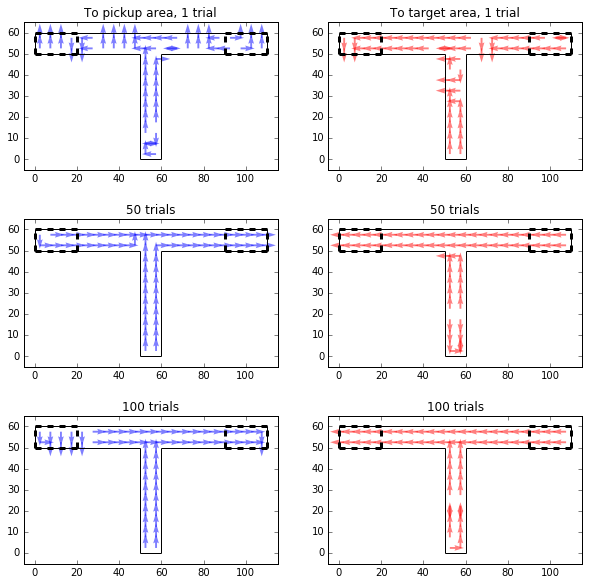

In [32]:
plt.figure(figsize=(10,10))
m.run(1,1)
plt.subplot(3,2,1)
plt.title("To pickup area, 1 trial")
nav(m, 0)
plt.subplot(3,2,2)
plt.title("To target area, 1 trial")
nav(m, 1)
m.run(50, 1)
plt.subplot(3,2,3)
plt.title("50 trials")
nav(m, 0)
plt.subplot(3,2,4)
plt.title("50 trials")
nav(m, 1)
m.run(100, 1)
plt.subplot(3,2,5)
plt.title("100 trials")
nav(m, 0)
plt.subplot(3,2,6)
plt.title("100 trials")
nav(m, 1)
plt.savefig("figures/navigation_map_trials.png")

In [21]:
m = Maze.Maze(lambda_=.4)
m.run(400, 1)

RUN 0


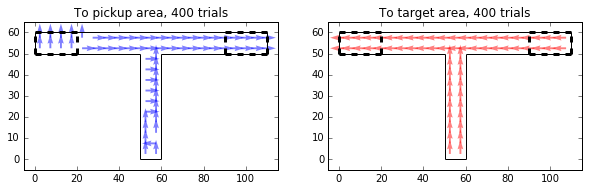

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("To pickup area, 400 trials")
nav(m, 0)
plt.subplot(122)
plt.title("To target area, 400 trials")
nav(m, 1)
plt.savefig("figures/navigation_map.png")

In [34]:
Ntr = 200
actions = [4, 8, 16]
lats = np.zeros((len(actions), Ntr))
for i,a in enumerate(actions): 
    m = Maze.Maze(lambda_=0.4, Nactions=a)
    m.run(Ntr, 5)
    lats[i] = m.get_learning_curve()

RUN 0
RUN 1
RUN 2
RUN 3
RUN 4
RUN 0
RUN 1
RUN 2
RUN 3
RUN 4
RUN 0
RUN 1
RUN 2
RUN 3
RUN 4


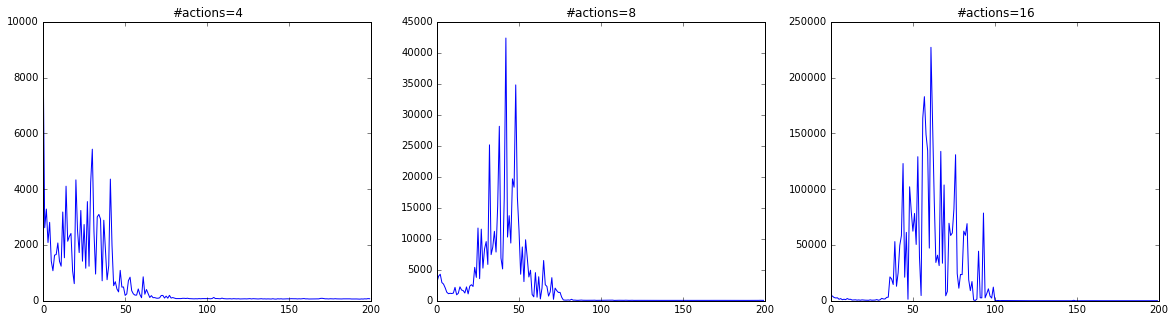

In [35]:
plt.figure(figsize=(20, 5))
for i in range(len(actions)): 
    plt.subplot(1,3,i+1)
    plt.plot(lats[i])
    plt.title("#actions={}".format(actions[i]))
#plt.savefig("figures/lc_act.png");

In [80]:
xs = m.centers[:,0]
ys = m.centers[:,1]

x_direction = np.zeros(64)
y_direction = np.zeros(64)
 
x_direction[actions[0,:]==2] = 1
x_direction[actions[0,:]==4] = -1
y_direction[actions[0,:]==1] = 1
y_direction[actions[0,:]==3] = -1 


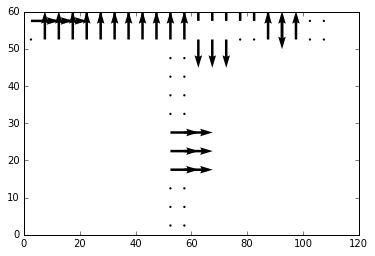

In [81]:
plt.figure/
plt.quiver(xs, ys, x_direction, y_direction)


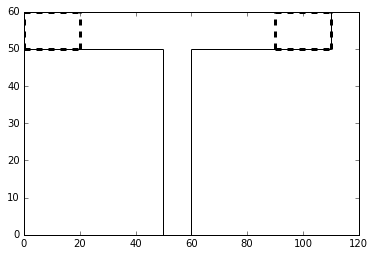

In [116]:
ax = plt.gca()
ax.vlines(x=50, ymin=0, ymax=50, color='k')
ax.vlines(x=60, ymin=0, ymax=50, color='k')
ax.vlines(x=0, ymin=50, ymax=60, color='k')
ax.vlines(x=110, ymin=50, ymax=60, color='k')
ax.vlines(x=110, ymin=50, ymax=60, linestyle = '--', linewidth=3, color='k')
ax.vlines(x=0, ymin=50, ymax=60, linestyle = '--', linewidth=3, color='k')
ax.vlines(x=90, ymin=50, ymax=60, linestyle = '--', linewidth=3, color='k')
ax.vlines(x=20, ymin=50, ymax=60, linestyle = '--', linewidth=3, color='k')

ax.hlines(y=50, xmin=0, xmax=50, color='k')
ax.hlines(y=60, xmin=0, xmax=110, color='k')
ax.hlines(y=50, xmin=60, xmax=110, color='k')
ax.hlines(y=50, xmin=0, xmax=20, linestyle = '--', linewidth=3, color='k')
ax.hlines(y=60, xmin=0, xmax=20, linestyle = '--', linewidth=3, color='k')
ax.hlines(y=50, xmin=90, xmax=110, linestyle = '--', linewidth=3, color='k')
ax.hlines(y=60, xmin=90, xmax=110, linestyle = '--', linewidth=3, color='k')
ax.hlines(y=0, xmin=50, xmax=60, color='k');

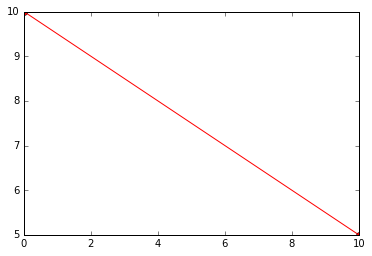

In [125]:
plt.plot([0, 10], [10, 5], '-o', color='r')